In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
#Visualization Imports

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
#To grab data

from pandas_datareader import DataReader
from datetime import datetime

In [0]:
#Do this to not worry about floating number later

from __future__ import division 

We’re going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [0]:
tech_list = ['AAPL','GOOG','MFST','AMZN']

In [0]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [0]:
for stock in tech_list:
  globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,194.956540,190.947809,192.917888,192.968646,3.272267e+07,191.113231
std,21.962656,21.740287,21.823686,21.793891,1.387881e+07,21.368644
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.934998,173.555000,174.805000,174.794998,2.320120e+07,173.366135
50%,198.850006,193.820007,196.419998,197.000000,2.982120e+07,195.501465
75%,210.690002,207.299995,209.430000,209.009995,3.890535e+07,207.600060
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,228.523819


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-13 to 2019-08-12
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


No missing info in the dataframe above, so we can go about our business.

##What’s the change in stock’s price over time?

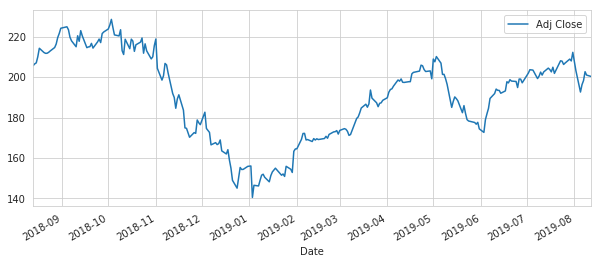

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

Similarily, we can plot change in a stock’s volume being traded, over time.

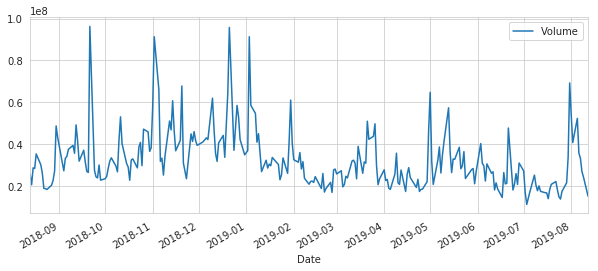

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

##What was the moving average of various stocks?
Let’s check out the moving average for stocks over a 10, 20 and 50 day period of time. We’ll add that information to the stock’s dataframe.

In [0]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()

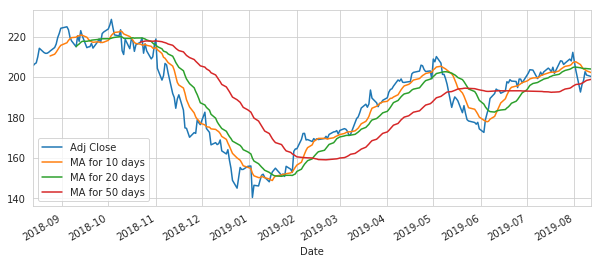

In [14]:
AAPL[['Adj Close', 'MA for 10 days' , 'MA for 20 days', 'MA for 50 days']].plot(subplots= False, figsize=(10,4))

Moving averages for more days have a smoother plot, as they’re less reliable on daily fluctuations. So even though, Apple’s stock has a slight dip near the start of August, it’s generally been on an upward trend since end of July.

##What was the daily return average of a stock?

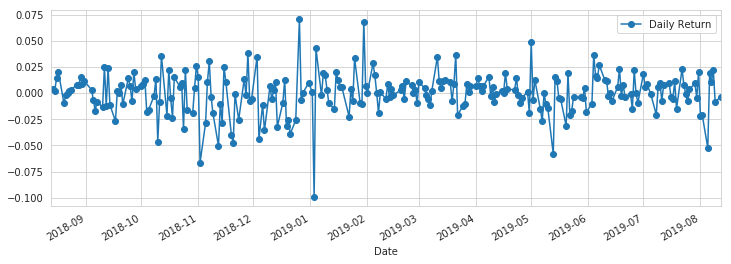

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (12,4),legend=True, linestyle= '-' , marker="o")

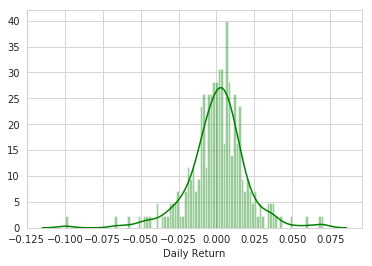

In [0]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color= 'green')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

##What was the correlation between daily returns of different stocks?

In [0]:
closing_df = DataReader(tech_list, 'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MFST
Date,,,,
2018-08-13,205.678345,1896.199951,1235.010010,0.0800
2018-08-14,206.544891,1919.650024,1242.099976,0.1000
2018-08-15,207.027420,1882.619995,1214.380005,0.0990
2018-08-16,210.060333,1886.520020,1206.489990,0.0715
2018-08-17,214.255234,1882.219971,1200.959961,0.0970


Everything works as expected.

Just as we did earlier, we can use Pandas’ pct_change method to get the daily returns of our stocks.

In [0]:
tech_rets = closing_df.pct_change()

In [19]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MFST
Date,,,,
2018-08-13,NaN,NaN,NaN,NaN
2018-08-14,0.004213,0.012367,0.005741,0.250000
2018-08-15,0.002336,-0.019290,-0.022317,-0.010000
2018-08-16,0.014650,0.002072,-0.006497,-0.277778
2018-08-17,0.019970,-0.002279,-0.004584,0.356643


Let’s try creating a scatterplot to visualise any correlations between different stocks. First we’ll visualise a scatterplot for the relationship between the daily return of a stock to itself.

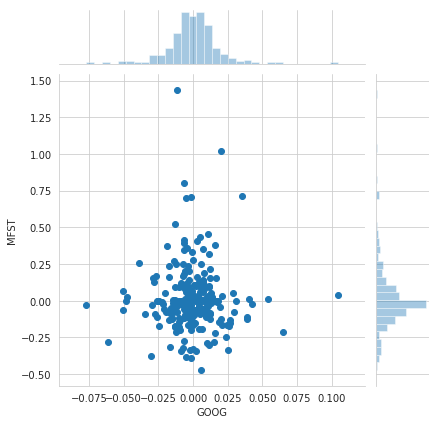

In [20]:
sns.jointplot('GOOG','MFST',tech_rets,kind='scatter')

In [21]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MFST
Date,,,,
2018-08-13,NaN,NaN,NaN,NaN
2018-08-14,0.004213,0.012367,0.005741,0.250000
2018-08-15,0.002336,-0.019290,-0.022317,-0.010000
2018-08-16,0.014650,0.002072,-0.006497,-0.277778
2018-08-17,0.019970,-0.002279,-0.004584,0.356643


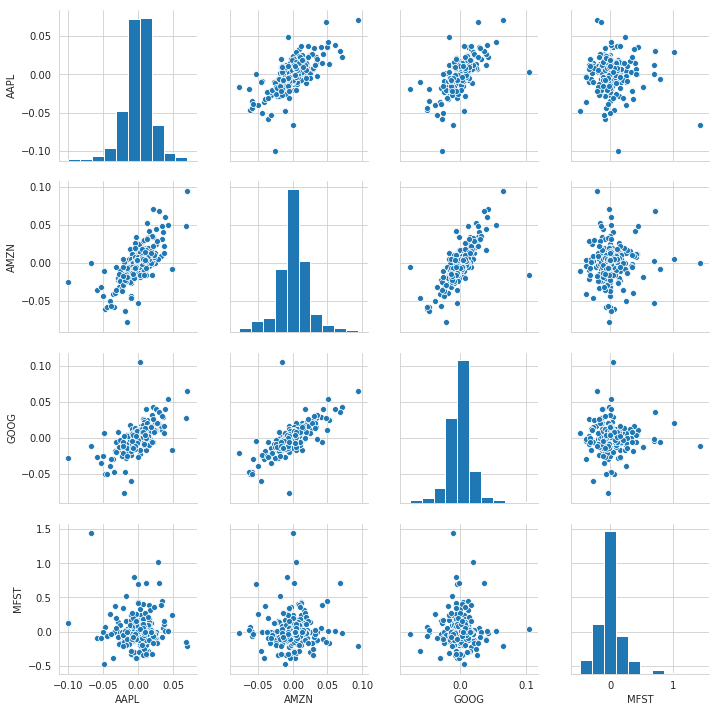

In [22]:
sns.pairplot(tech_rets.dropna())

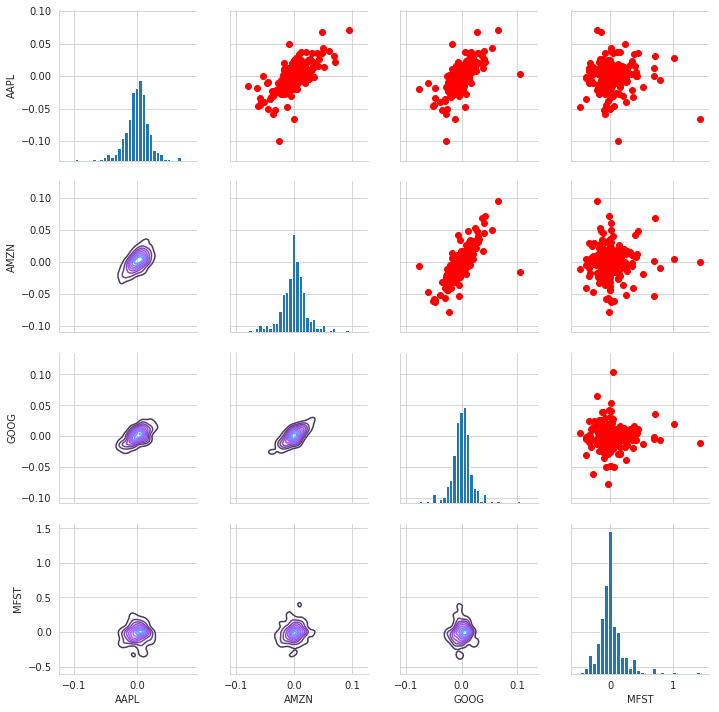

In [23]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='red')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

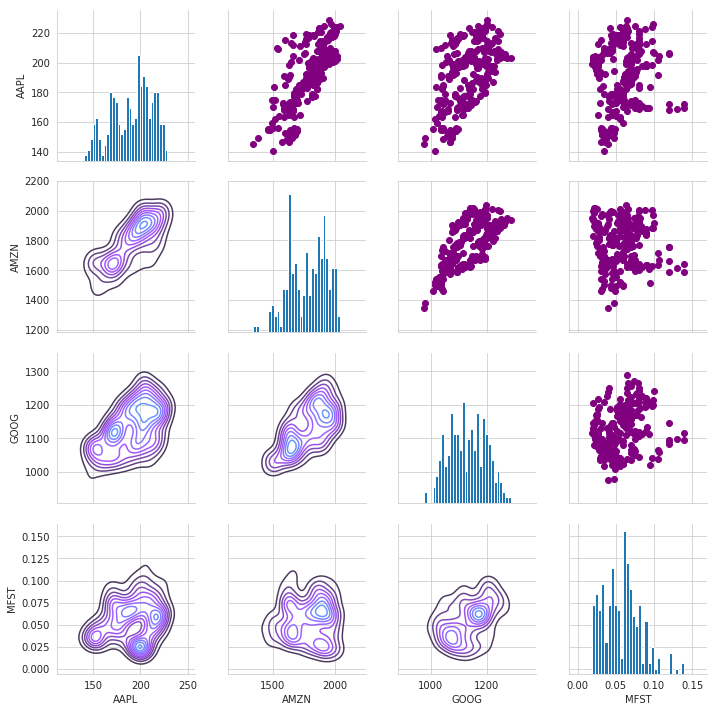

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn’s corrplot method.

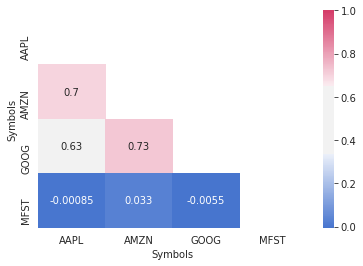

In [25]:
#Since the corrplot is deprecated, I still try to use heatmap as shpwn below
#Compute the correlation matrix
corr = tech_rets.dropna().corr()

# Generate a mask for the upper triangle
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap , annot = True)

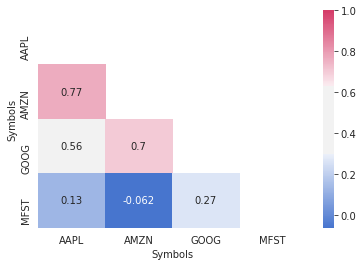

In [26]:
corr = closing_df.dropna().corr()

# Generate a mask for the upper triangle
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap , annot = True)

Here we can see that, Google and Amazon and Apple Amazon have a strong correlation


###Risk Analysis

In [0]:
rets = tech_rets.dropna()

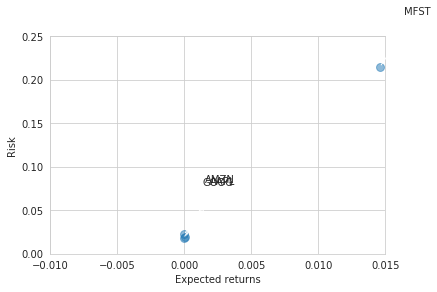

In [29]:

area = np.pi*20


plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
ax=plt.gca()
ax.set_xlim(-0.01,0.015)
ax.set_ylim(0.00,0.25)
plt.xlabel('Expected returns')
plt.ylabel('Risk')



for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad= 0'))
    
    

We see that Google, Apple and Amazon have approximately similar returns while Microsoft is having a good return but the Risk is also high

##Value at Risk(Quantile)
We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We’ll use the ‘Bootstrap’ method and the ‘Monte Carlo Method’ to extract this value.

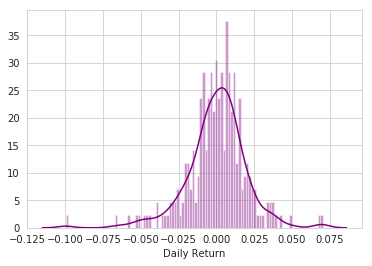

In [30]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [31]:
rets['AAPL'].quantile(0.05)

-0.031670163190108264

###The 0.05 empirical quantile of daily returns is at -0.03. That means that with 95% confidence, worst daily loss will not exceed 3%. If we have a 1 million dollar investment, our one day 5% VaR is 0.03 * 1,000,000 = $30,000.

##How can we attempt to predict future stock behaviour?
Monte Carlo Method

In [0]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [0]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

We’re going to run the simulation of Google stocks. Let’s check out the opening value of the stock.

In [34]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-13,1249.272949,1233.640991,1236.979980,1235.010010,997300,1235.010010
2018-08-14,1245.869995,1225.109985,1235.189941,1242.099976,1348100,1242.099976
2018-08-15,1235.239990,1209.510010,1229.260010,1214.380005,1828800,1214.380005
2018-08-16,1226.000000,1202.550049,1224.729980,1206.489990,1343200,1206.489990
2018-08-17,1209.020020,1188.239990,1202.030029,1200.959961,1389600,1200.959961


Let's do simulations of 100 runs and plot a graph

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

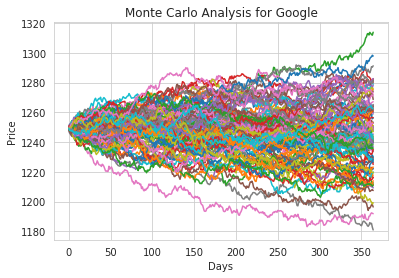

In [35]:
# Get start price from GOOG.head()
start_price = 1249.27

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)



In [0]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

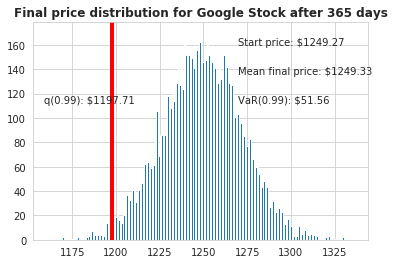

In [37]:
# Now we'lll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

What the above figure means is that, when you invest at the start price you .. at the most that is, 99% of the time the maximum loss you would face is of $51.56 over a year